In [2]:
import pickle

with open('newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)

 Clean Newsgroup Data


In [5]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'\W+', ' ', text.lower())  # Lowercase & remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

cleaned_corpus = [clean_text(doc) for doc in newsgroup_data]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Vectorization
LDA needs CountVectorizer

NMF prefers TfidfVectorizer

In [6]:
# For LDA
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(cleaned_corpus)

# For NMF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_data = tfidf_vectorizer.fit_transform(cleaned_corpus)


Apply LDA & NMF (10 Topics)

In [7]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

# LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(count_data)

# NMF
nmf = NMF(n_components=10, random_state=42)
nmf.fit(tfidf_data)


NMF(n_components=10, random_state=42)

 Display Topics (Top 10 Words)

In [8]:
import numpy as np

def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

print("LDA Topics:")
display_topics(lda, count_vectorizer.get_feature_names_out(), 10)

print("NMF Topics:")
display_topics(nmf, tfidf_vectorizer.get_feature_names_out(), 10)


LDA Topics:
Topic #1:
time know day use year good like work say bike

Topic #2:
people think god know good like time atheism say thing

Topic #3:
game team year win player play season hockey think good

Topic #4:
edu space com nasa center data information available program cancer

Topic #5:
like time monitor thing good vga say better think year

Topic #6:
car year like oil good time driver mile engine brake

Topic #7:
msg food chi bos period det pit doctor tor new

Topic #8:
know thing like people think say simms want doctor new

Topic #9:
like game line think lot puck king need bike work

Topic #10:
drive disk card scsi controller hard use problem bios pin

NMF Topics:
Topic #1:
time think problem people thing good like way know long

Topic #2:
drive disk scsi hard floppy cable boot problem power pin

Topic #3:
pitt geb dsl chastity shameful cadre intellect n3jxp skepticism surrender

Topic #4:
game team year player play win season hockey league leaf

Topic #5:
car driver price auto d

LDA - Topic 1


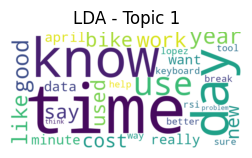

LDA - Topic 2


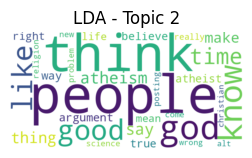

LDA - Topic 3


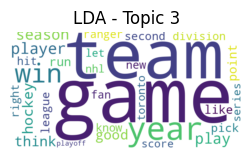

LDA - Topic 4


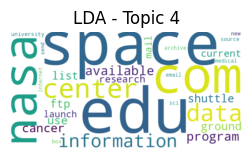

LDA - Topic 5


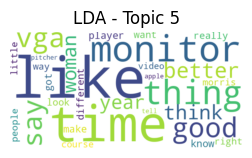

LDA - Topic 6


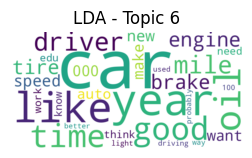

LDA - Topic 7


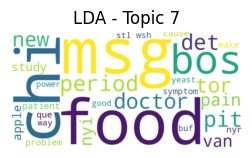

LDA - Topic 8


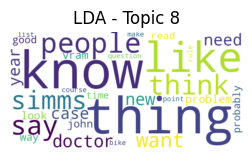

LDA - Topic 9


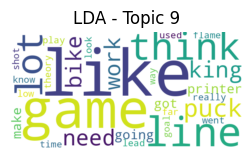

LDA - Topic 10


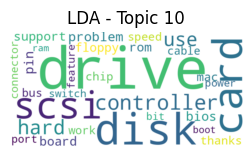

NMF - Topic 1


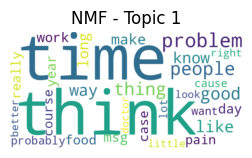

NMF - Topic 2


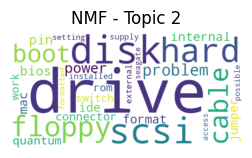

NMF - Topic 3


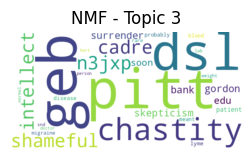

NMF - Topic 4


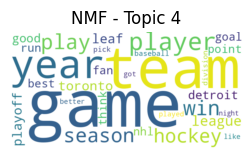

NMF - Topic 5


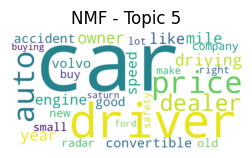

NMF - Topic 6


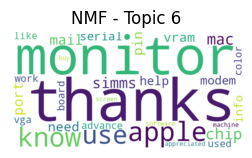

NMF - Topic 7


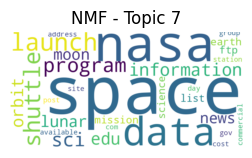

NMF - Topic 8


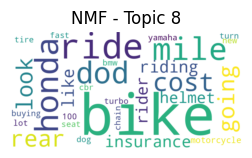

NMF - Topic 9


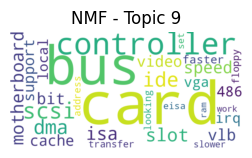

NMF - Topic 10


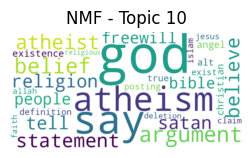

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordclouds(model, feature_names, title):
    for idx, topic in enumerate(model.components_):
        print(f"{title} - Topic {idx+1}")
        word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-30:-1]}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(3, 2))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{title} - Topic {idx+1}")
        plt.show()

plot_wordclouds(lda, count_vectorizer.get_feature_names_out(), "LDA")
plot_wordclouds(nmf, tfidf_vectorizer.get_feature_names_out(), "NMF")
